# Lab: Machine Learning and Text Classification Fundamentals

Welcome to this lab session designed to introduce core machine learning concepts and text classification techniques. In this lab you will:

- Differentiate between supervised and unsupervised learning.
- Visualize and simulate the training process of a simple model.
- Discuss multi-class classification strategies, including "one vs. one" and "one vs. all" approaches.
- Apply basic probability concepts using Bayes theorem.
- Implement a plug and play example and then extend it to calculate word frequencies in text.

These skills are not just academic; they also mirror practical steps you might take on the job, such as debugging model training issues, optimizing learning schedules, and processing textual data for insights.

Let's get started!

## Understanding Learning Paradigms

Supervised learning involves training a model on labeled data, where each input has a corresponding output label. In contrast, unsupervised learning uses data without explicit labels to try to identify inherent patterns or groupings.

We will learn more about unsupervised learning techniques in later parts of phase 2. This entails tasks such as:
* Recommending the next song/article/movie to watch for uncategorized users
* Reducing the size of your dataset to get better predictive capabilities
* Predicting the next word in a sentence.

## Visualizing the Training Process (Plug and Play)

Below is a simple simulation of the training process of a supervised model. The code initializes some weights, updates them iteratively by subtracting a fraction of the current error, and decreases the error over iterations. Run the following code cell to see how the weights are updated step by step.

In [80]:
# Initialize weights (starting with random values)

# think of these two values as your beta-0 and beta-1 coefficients (B0 + B1X)
# TODO: set these betas to different values, see how your MSE changes!
b0, b1 = 0.0, 0.0

# think of these as your "true" samples. First data point is X, second is Y
y = [
    [1, 2],
    [2, 3],
    [3, 5],
    [4, 7]
]
n = len(y)

# your starting error
# calculated by creating prediction and measuring error (MSE)
total_error = 0
for data in y:
    yi = data[1]
    xi = data[0]
 
    # B0 + B1 * X
    yhat_i = b0 + (b1 * xi)
    # calculate squared residual
    error = (yi - yhat_i)**2

    # add up error
    total_error += error
    

print("Mean squared error is", total_error / n )

Mean squared error is 21.75


In [81]:
# the learning rate of your model
# TODO: play around with this learning_rate, what happens to our training?
learning_rate = 0.1

print("Training process simulation:")

for i in range(5):
    # calculate adjustment based on current error and learning rate
    b0_gradient = 0
    b1_gradient = 0

    # calcuate gradient descent on all data-points1
    for data in y:
        xi = data[0]
        yi = data[1]
        yhat_i = b0 + b1 * xi 
        error = yhat_i - yi

        # Partial derivatives of the MSE loss function
        b0_gradient += error
        b1_gradient += error * xi

    # calculate the average of all gradients
    b0_gradient = (2 / n) * b0_gradient
    b1_gradient = (2 / n) * b1_gradient

    # calculate your updated weights 
    b0 = b0 - learning_rate * b0_gradient
    b1 = b1 - learning_rate * b1_gradient
    
    # measure your new error
    total_error = 0
    for data in y:
        yi = data[1]
        xi = data[0]
    
        # B0 + B1 * X
        yhat_i = b0 + (b1 * xi)
        # calculate squared residual
        error = (yi - yhat_i)**2

        # add up error
        total_error += error / n

    print("Iteration", i+1, "we get weights:", b0, b1, "with error:", round(total_error, 4))


Training process simulation:
Iteration 1 we get weights: 0.8500000000000001 2.5500000000000003 with error: 9.8288
Iteration 2 we get weights: 0.255 0.8499999999999999 with error: 4.475
Iteration 3 we get weights: 0.6290000000000001 1.9975 with error: 2.0701
Iteration 4 we get weights: 0.3544500000000001 1.23675 with error: 0.9891
Iteration 5 we get weights: 0.5151850000000001 1.7544 with error: 0.5027


## Multi-Class Classification Strategies

In many classification problems, you have to decide how to handle scenarios with more than two classes. Two common strategies are:

- **One vs. One Classification:** A classifier is trained for every pair of classes.
- **One vs. All Classification:** A classifier is trained for each class against all the others.

Below, we demonstrate how we can create one v one classifiers using the `iris` dataset, which contains samples of 3 kinds of flowers. Using multiple logistic regression models, we can c

But first let's perform exploratory data analysis.

In [82]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("iris.csv")

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Univariate Analysis

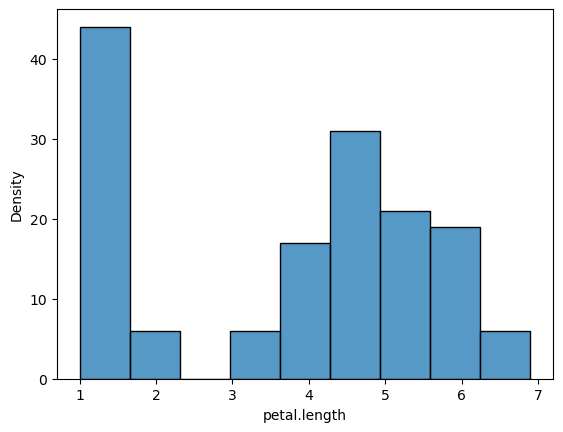

In [83]:
# View distribution of petal.length
sns.histplot(data=df, x="petal.length", fill=True)
plt.xlabel("petal.length")
plt.ylabel('Density')
plt.show()

In [84]:
# TODO: continue your univariate analysis!

### Bivariate Analysis

C:\Users\saidmf\AppData\Local\Temp\ipykernel_17172\1652572253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='variety', y="petal.length", palette=species_colors.values())
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


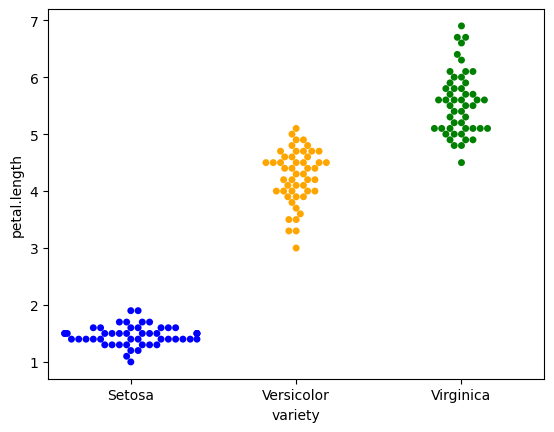

In [85]:
species_colors = {'setosa': 'blue', 'versicolor': 'orange', 'virginica': 'green'}

sns.swarmplot(data=df, x='variety', y="petal.length", palette=species_colors.values())
plt.xlabel('variety')
plt.ylabel("petal.length")
plt.show()

In [86]:
# TODO: continue your bivariate analysis!

### One vs One Machine Learning

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report

# TODO: based on your analysis, which predictor shows clear differences amongst species?
X = df[["petal.length"]]

y = df["variety"]

# form train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# generate base logistic model
base_model = LogisticRegression()

# use base model in classifier
ovo_clf = OneVsOneClassifier(base_model)

In [88]:
# define hyperparameter grid
param_grid = {
    'estimator__C': [0.01, 0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__solver': ['saga'], 
    'estimator__max_iter': [10000]
}

# use GridSearchCV to search over hyperparameters
grid_search = GridSearchCV(ovo_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'estimator__C': 0.1, 'estimator__max_iter': 10000, 'estimator__penalty': 'l1', 'estimator__solver': 'saga'}

Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Bayes Theorem Calculation

Bayes theorem helps us update our belief about a hypothesis given new evidence. The formula is:

   Posterior = (Likelihood × Prior) / Evidence

The code below implements a simple calculation using this formula. Run the cell to see how the posterior probability is computed.

In [89]:
# Trial 1
prior = 0.98         # Initial belief (prior probability) (P(H))
likelihood = 0.5    # Probability of observing the evidence given the hypothesis (P(E|H))

evidence = (prior * 0.5) + ((1 - prior) * 0.8)    # Overall probability of observing the evidence (P(H)P(E|H) + P(-H)P(E|-H))

# Calculate the posterior probability using Bayes Theorem
posterior = (likelihood * prior) / evidence

print("Posterior probability for trial 1 (updated likelihood that coin is fair):", posterior)

Posterior probability for trial 1 (updated likelihood that coin is fair): 0.9683794466403162


In [90]:
# Trial 2: reuse previous posterior probability to calculate updated metrics

prior = posterior
evidence = (posterior * 0.5) + ((1-posterior) * 0.8)

# Calculate the posterior probability using Bayes Theorem
posterior = (likelihood * prior) / evidence

print("Posterior probability for trial 2 (updated likelihood that coin is fair):", posterior)

Posterior probability for trial 2 (updated likelihood that coin is fair): 0.9503491078355313


In [91]:
# Trial 3: again, update probability to view updated likelihood that coin is fair

prior = posterior
evidence = (posterior * 0.5) + ((1-posterior) * 0.8)

# Calculate the posterior probability using Bayes Theorem
posterior = (likelihood * prior) / evidence

print("Posterior probability for trial 3 (updated likelihood that coin is fair):", posterior)

Posterior probability for trial 3 (updated likelihood that coin is fair): 0.9228567123700466


In [92]:
# Trial 4: evidence in the other direction (what if we flip a tails?)

prior = posterior
evidence = (posterior * 0.5) + ((1-posterior) * 0.2)

# Calculate the posterior probability using Bayes Theorem
posterior = (likelihood * prior) / evidence

print("Posterior probability for trial 4 (updated likelihood that coin is fair):", posterior)

Posterior probability for trial 4 (updated likelihood that coin is fair): 0.9676451072703719


## Word Frequency for Text Classification

A simple yet powerful method for text classification is counting the frequency of words in a text (as we will see in next weeks classifier). 

Let's get introduced to this idea by splitting a sample sentence into words, counts how often each word appears, and displays the result in a table using pandas.

Let's see if we can subsequently use this to calculate the probability of a text being spam or not spam.

In [93]:
# Spam text data
spam_texts = [
    "hello your USPS package was not able to be delivered. click here!",
    "FREE PHONE! click here!",
    "USPS package not delivered! click here!"
]

# Normal text data
normal_texts = [
    "hey whats the central limit theorem",
    "hey my phone is about to die"
]

# Split the text into individual words and count up the frequencies
spam_frequencies = {}
normal_frequencies = {}

# count up frequencies for spam texts
for text in spam_texts:
    # remove all punctuation marks (can punctuation be used to classify spam?)
    no_punctuation = text.replace(".", "").replace("!", "")

    # split text and count up frequencies
    words = no_punctuation.split()
    for w in words:
        if w not in spam_frequencies:
            spam_frequencies[w] = 1
        else:
            spam_frequencies[w] += 1

# count up frequencies for normal texts
for text in normal_texts:
    # remove all punctuation marks (can punctuation be used to classify spam?)
    no_punctuation = text.replace(".", "").replace("!", "")

    # split text and count up frequencies
    words = no_punctuation.split()
    for w in words:
        if w not in normal_frequencies:
            normal_frequencies[w] = 1
        else:
            normal_frequencies[w] += 1

print("spam frequency", spam_frequencies)
print("normal word frequency",normal_frequencies)

spam frequency {'hello': 1, 'your': 1, 'USPS': 2, 'package': 2, 'was': 1, 'not': 2, 'able': 1, 'to': 1, 'be': 1, 'delivered': 2, 'click': 3, 'here': 3, 'FREE': 1, 'PHONE': 1}
normal word frequency {'hey': 2, 'whats': 1, 'the': 1, 'central': 1, 'limit': 1, 'theorem': 1, 'my': 1, 'phone': 1, 'is': 1, 'about': 1, 'to': 1, 'die': 1}


In [94]:
# normalize both frequency tables (divide by number of total texts)
for w in spam_frequencies:
    spam_frequencies[w] = round(spam_frequencies[w] / len(spam_frequencies), 2)

for w in normal_frequencies:
    normal_frequencies[w] = round(normal_frequencies[w] / len(normal_frequencies), 2)

print("spam frequency", spam_frequencies)
print("normal word frequency",normal_frequencies)

spam frequency {'hello': 0.07, 'your': 0.07, 'USPS': 0.14, 'package': 0.14, 'was': 0.07, 'not': 0.14, 'able': 0.07, 'to': 0.07, 'be': 0.07, 'delivered': 0.14, 'click': 0.21, 'here': 0.21, 'FREE': 0.07, 'PHONE': 0.07}
normal word frequency {'hey': 0.17, 'whats': 0.08, 'the': 0.08, 'central': 0.08, 'limit': 0.08, 'theorem': 0.08, 'my': 0.08, 'phone': 0.08, 'is': 0.08, 'about': 0.08, 'to': 0.08, 'die': 0.08}


In [95]:
# we also need to include words that dont show up in both dictionaries and assign them a probability of 0
spam_words = list(spam_frequencies.keys())
normal_words = list(normal_frequencies.keys())

for w in spam_words:
    normal_frequencies[w] = 0

for w in normal_words:
    spam_frequencies[w] = 0

print("spam frequency", spam_frequencies)
print("normal word frequency",normal_frequencies)

spam frequency {'hello': 0.07, 'your': 0.07, 'USPS': 0.14, 'package': 0.14, 'was': 0.07, 'not': 0.14, 'able': 0.07, 'to': 0, 'be': 0.07, 'delivered': 0.14, 'click': 0.21, 'here': 0.21, 'FREE': 0.07, 'PHONE': 0.07, 'hey': 0, 'whats': 0, 'the': 0, 'central': 0, 'limit': 0, 'theorem': 0, 'my': 0, 'phone': 0, 'is': 0, 'about': 0, 'die': 0}
normal word frequency {'hey': 0.17, 'whats': 0.08, 'the': 0.08, 'central': 0.08, 'limit': 0.08, 'theorem': 0.08, 'my': 0.08, 'phone': 0.08, 'is': 0.08, 'about': 0.08, 'to': 0, 'die': 0.08, 'hello': 0, 'your': 0, 'USPS': 0, 'package': 0, 'was': 0, 'not': 0, 'able': 0, 'be': 0, 'delivered': 0, 'click': 0, 'here': 0, 'FREE': 0, 'PHONE': 0}


In [96]:
# use these frequency tables to calculate probability that a new text is spam or not!

new_text = "Do you want a job? Click here!"

# use bayes theorem to calculate if this text is a spam (or not spam)

no_punctuation = new_text.replace(".", "").replace("!", "")
words = no_punctuation.split()

# use ratio of spam to not spam texts to calculate initial probability
spam_probability = len(spam_texts) / (len(spam_texts) + len(normal_texts))
not_spam_probability = len(normal_texts) / (len(spam_texts) + len(normal_texts))

for w in words:
    if w in normal_frequencies and w in spam_frequencies:
        # ignore 0's for now
        if normal_frequencies[w] == 0:
            continue
        spam_probability = spam_probability * normal_frequencies[w]
        not_spam_probability = not_spam_probability * normal_frequencies[w]

print(spam_probability)
print(not_spam_probability)

0.6
0.4


## Wrap-Up

In this lab, you explored several foundational topics in machine learning and text processing:

- You examined the differences between supervised and unsupervised learning and considered real-world applications.
- You simulated a training process and extended that simulation to include a variable learning rate, linking the practice to how model optimization might occur in industry.
- You discussed multi-class classification strategies and their pros and cons.
- You applied Bayes theorem for probability updating and enhanced the example to interact with user inputs.
- Finally, you implemented a word frequency counter for text classification, then extended it to process external text files.

These exercises build a bridge between theoretical concepts and their practical applications, a crucial skill in any data-driven role.